In [2]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
figsettings()
from beta import *

In [19]:
samples = get_samples('slab_spike', reduced=0)[1]
cov = samples[[0, 1, 2, 3]].cov()
np.linalg.eigvals(np.array(cov))

array([0.00485377, 0.00562156, 0.00523756, 0.0053205 ])

In [85]:
samples = get_samples('BAO', reduced=0)[1]
cov = np.array(samples[samples.drop_labels().columns[:-3]].cov())

omegabh2    Axes(0.044...
omegach2    Axes(0.348...
theta       Axes(0.651...
tau         Axes(0.044...
logA        Axes(0.348...
ns          Axes(0.651...
dtype: object

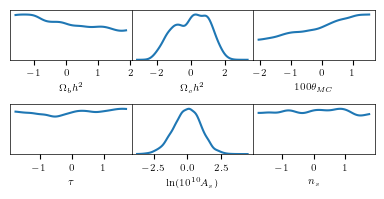

In [86]:
samples_norm = (samples - samples.mean())/samples.std()
samples_norm[samples.drop_labels().columns[:6]].plot_1d()

In [87]:
samples_norm = samples_norm[samples.drop_labels().columns[:-3]].drop('chi2_prior', axis=1)
samples_norm = samples_norm.drop('omeganuh2', axis=1)

/tmp/ipykernel_220861/4251141655.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  samples_norm = samples_norm[samples.drop_labels().columns[:-3]].drop('chi2_prior', axis=1)
/tmp/ipykernel_220861/4251141655.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  samples_norm = samples_norm.drop('omeganuh2', axis=1)


In [96]:
eigs = np.real(np.linalg.eigvals(samples_norm.cov()))
np.sum(eigs**2)

1101.1002094013345

In [98]:
eigs**2

array([6.09459284e+02, 3.42510131e+02, 9.70217497e+01, 3.01796737e+01,
       1.01051029e+01, 7.52123684e+00, 4.11275047e+00, 1.88604968e-01,
       1.30924922e-03, 1.81236965e-04, 1.16132245e-04, 4.04434861e-05,
       1.46261644e-05, 1.02533280e-05, 1.36133505e-06, 1.06984083e-06,
       5.00887709e-07, 3.59485171e-07, 1.79545595e-07, 7.37611392e-08,
       5.57242036e-08, 1.47485322e-08, 9.65199488e-09, 1.59169806e-09,
       5.87410898e-10, 2.87384537e-10, 5.28674146e-11, 7.53800131e-13,
       1.99560628e-13, 1.11008866e-13, 3.56294573e-14, 1.23351354e-14,
       4.99546134e-15, 2.88946295e-15, 2.23909025e-15, 1.97495168e-16,
       8.71389993e-17, 1.03419048e-17, 2.53739059e-18, 3.07416845e-20,
       2.57041930e-21, 4.71688056e-22, 7.06793869e-23, 3.04141828e-23,
       4.42382111e-24, 5.47783618e-25, 5.20903910e-27, 1.93043931e-27,
       9.25643265e-28, 7.07974532e-29, 3.44424425e-29, 3.37581771e-29,
       3.01773582e-29, 2.68105734e-29, 1.39982702e-29, 1.23632455e-30,
      

omegabh2    Axes(0.044...
omegach2    Axes(0.348...
theta       Axes(0.651...
tau         Axes(0.044...
logA        Axes(0.348...
ns          Axes(0.651...
dtype: object

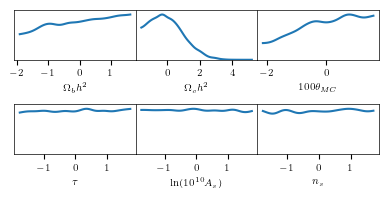

In [3]:
name, samples = get_samples('SH0ES', reduced=0)
samples_norm = (samples - samples.mean())/samples.std()
samples_norm[samples.drop_labels().columns[:6]].plot_1d()

In [12]:
name, samples = get_samples('planck_gaussian', reduced=0)
samples_params = samples.drop(samples.drop_labels().columns[6:], axis=1)
samples_norm = (samples_params - samples_params.mean())/samples_params.std()
sorted(np.linalg.eigvals(samples_norm.cov()))

/tmp/ipykernel_243539/1971950559.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  samples_params = samples.drop(samples.drop_labels().columns[6:], axis=1)


[0.0613739094991222,
 0.2981541618349399,
 0.6034318523198505,
 0.7867978884666463,
 1.2865587100123468,
 2.9636834778670993]

In [26]:
np.linalg.eigvalsh(samples_norm.cov())

array([0.06137391, 0.29815416, 0.60343185, 0.78679789, 1.28655871,
       2.96368348])

In [19]:
samples_norm.cov()

,,omegabh2,omegach2,theta,tau,logA,ns
,labels,$\Omega_b h^2$,$\Omega_c h^2$,$100\theta_{MC}$,$\tau$,${\rm{ln}}(10^{10} A_s)$,$n_s$
,labels,,,,,,
omegabh2,$\Omega_b h^2$,1.000000,-0.535179,0.369512,0.314165,0.276985,0.374035
omegach2,$\Omega_c h^2$,-0.535179,1.000000,-0.324393,-0.421517,-0.272120,-0.670284
theta,$100\theta_{MC}$,0.369512,-0.324393,1.000000,0.192852,0.170351,0.302283
tau,$\tau$,0.314165,-0.421517,0.192852,1.000000,0.923090,0.371916
logA,${\rm{ln}}(10^{10} A_s)$,0.276985,-0.272120,0.170351,0.923090,1.000000,0.254419
ns,$n_s$,0.374035,-0.670284,0.302283,0.371916,0.254419,1.000000


In [17]:
np.linalg.eigvals(samples_norm.cov()).sum()

6.000000000000005

In [15]:
samples.d_G(10)

samples
0    5.974246
1    5.680729
2    5.918150
3    5.986701
4    6.112514
5    5.914038
6    6.095028
7    5.909025
8    5.979242
9    5.806772
Name: d_G, dtype: float64

,omegabh2,omegach2,theta,tau,logA,ns
omegabh2,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
omegach2,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
theta,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
tau,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
logA,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
ns,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


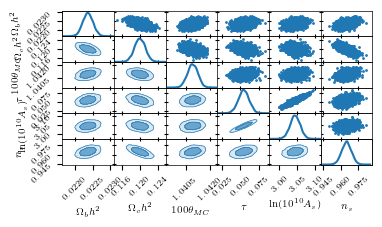

In [13]:
samples_params.plot_2d()

,omegabh2,omegach2,theta,tau,logA,ns
omegabh2,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
omegach2,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
theta,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
tau,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
logA,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
ns,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


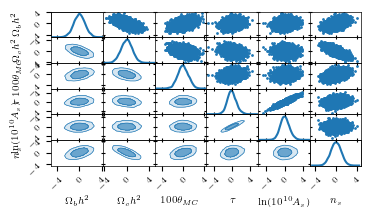

In [8]:
samples_norm.plot_2d()

17.284654012000516

In [142]:
np.linalg.eigvals(np.cov(samples_params.T))

: 

omegabh2    Axes(0.044...
omegach2    Axes(0.348...
theta       Axes(0.651...
tau         Axes(0.044...
logA        Axes(0.348...
ns          Axes(0.651...
dtype: object

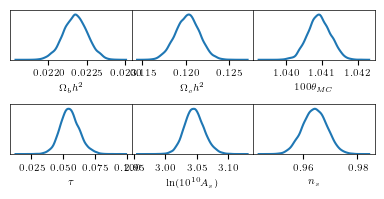

In [128]:
samples_params.plot_1d()

In [111]:
samples_norm = samples_norm[samples.drop_labels().columns[:-3]].drop('chi2_prior', axis=1)
samples_norm = samples_norm.drop('omeganuh2', axis=1)
eigs = np.abs(np.linalg.eigvals(samples_norm.cov()))
eigs

/tmp/ipykernel_220861/3779619003.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  samples_norm = samples_norm[samples.drop_labels().columns[:-3]].drop('chi2_prior', axis=1)
/tmp/ipykernel_220861/3779619003.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  samples_norm = samples_norm.drop('omeganuh2', axis=1)


array([2.30923954e+01, 1.88772962e+01, 1.04841643e+01, 5.09809627e+00,
       3.19659358e+00, 2.17563714e+00, 9.04097227e-01, 1.08629861e-01,
       1.79559736e-02, 1.27615813e-02, 1.04673985e-02, 7.02025790e-03,
       5.90509565e-03, 5.09508578e-03, 1.43907604e-03, 1.09610615e-03,
       4.31188372e-04, 3.40341575e-04, 3.00131204e-04, 1.19829820e-04,
       8.07048067e-05, 3.54755259e-05, 1.81475671e-05, 1.04325406e-05,
       5.64639841e-06, 3.08899523e-06, 1.43638777e-06, 1.32450956e-06,
       7.85837778e-07, 3.64710710e-07, 2.47475011e-07, 2.21734851e-07,
       8.04780635e-08, 4.17057082e-08, 1.89299743e-08, 1.24051032e-08,
       1.73807985e-09, 4.98801873e-10, 3.43491618e-10, 1.06913333e-10,
       3.31822103e-11, 6.15735227e-12, 3.40897803e-12, 7.63934024e-13,
       3.01871189e-13, 1.45381218e-13, 5.34538613e-14, 1.83429332e-14,
       9.67807634e-15, 6.57017048e-15, 1.85662841e-15, 1.45455228e-15,
       1.08896369e-15, 9.65107963e-16, 6.62684154e-16, 5.56701284e-16,
      

In [42]:
def get_beta_post(points, ndead):
    betas = np.logspace(-15, 5, 1000)
    logX = points.logX()
    logL = points.logL
    logXs = logX.iloc[ndead]
    logLs = logL.iloc[ndead]
    logLbetasX = betas * logLs + logXs
    logLbetasX -= points.logZ(beta=betas) - np.log(betas)
    logprob = logLbetasX - logsumexp(logLbetasX)
    mean = np.sum(np.exp(logprob)*np.log(betas))
    var = np.sum(np.exp(logprob)*(np.log(betas)-mean)**2)
    return mean, np.sqrt(var)

def get_d_G_post(points, ndead):
    beta_mean, beta_std = get_beta_post(points, ndead)
    betas_post = np.exp(np.random.normal(beta_mean, beta_std, 100))
    d_G_post = points.d_G(beta=betas_post)
    return d_G_post.values, f"{len(betas_post)} samples"

def logXfs_post(points, ndead, Nset=25):
    d_G = get_d_G_post(points, ndead)[0]
    mean, std = d_G.mean(), d_G.std()
    
    logL, X_mean, nk, logZdead = data(points)
    logXf_set = np.zeros(Nset)
    for i in range(Nset):
        X = generate_Xs(nk)
        d = np.random.normal(mean, std)
        while d < 0:
            d = np.random.normal(mean, std)
        theta = params_from_d(logL[ndead:], X[ndead:], d)
        logXf_set[i] = logXf_formula(theta, logZdead, X_mean[ndead])
        if np.isnan(logXf_set[i]):
            print(mean, std)
    logXf_set = logXf_set[~np.isnan(logXf_set)]
    # logXf_set = reject_outliers(logXf_set)
    return logXf_set, f"{len(logXf_set)} samples, {d_G.mean():.1f}"

def inferences_post(points, ndead, Nset=25):
    d_G = get_d_G_post(points, ndead)[0]
    mean, std = d_G.mean(), d_G.std()
    
    logL, X_mean, nk, logZdead = data(points)
    logXf_set = np.zeros(Nset)
    for i in range(Nset):
        X = generate_Xs(nk)
        d = np.random.normal(mean, std)
        while d < 0:
            d = np.random.normal(mean, std)
        theta = params_from_d(logL[ndead:], X[ndead:], d)
        logXf_set[i] = logXf_formula(theta, logZdead, X_mean[ndead])
        if np.isnan(logXf_set[i]):
            print(mean, std)
    logXf_set = logXf_set[~np.isnan(logXf_set)]
    # logXf_set = reject_outliers(logXf_set)
    return [logXf_set, d_G], f"{len(logXf_set)} samples, {d_G.mean():.1f}"

def inferences(model, method, iterations, **kwargs):
    samples = model.samples
    logXfs, logXfs_std = np.zeros(len(iterations)), np.zeros(len(iterations))
    d_Gs, d_Gs_std = np.zeros(len(iterations)), np.zeros(len(iterations))
    for i, ndead in enumerate(iterations):
        points = points_at_iteration(samples, ndead).recompute()
        [logXf_set, d_G_set], message = method(points, ndead, **kwargs)
        logXfs[i], logXfs_std[i] = logXf_set.mean(), logXf_set.std()
        d_Gs[i], d_Gs_std[i] = d_G_set.mean(), d_G_set.std()
        print('\r', f"Iteration {ndead} of {iterations[-1]}, {message}", end='')
    return logXfs, logXfs_std, d_Gs, d_Gs_std

def get_betas(model, method, iterations, **kwargs):
    samples = model.samples
    logbetas, logbetas_std = np.zeros(len(iterations)), np.zeros(len(iterations))
    for i, ndead in enumerate(iterations):
        points = points_at_iteration(samples, ndead)
        args = method(points, ndead)
        if isinstance(args, float):
            logbetas[i] = args
        else:
            logbetas[i], logbetas_std[i] = args
        print('\r', f"Iteration {ndead} of {iterations[-1]}, logbeta={logbetas[i]:.1f}", end='')
    return logbetas, logbetas_std

def get_beta_grad(points, ndead, interval=50):
    logX = points.logX()
    logL = points.logL
    return np.log(-(logX.iloc[ndead+interval] - logX.iloc[ndead-interval])/(logL.iloc[ndead+interval] - logL.iloc[ndead-interval]))

In [56]:
from anesthetic import read_chains
samples = read_chains('chains/slab_spike')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

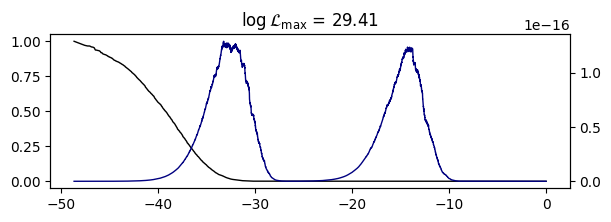

In [57]:
plot_lx(samples)

In [58]:
iterations = make_iterations(true_endpoint, 50)
logXs = samples.logX().iloc[iterations]
logbetas, logbetas_std = get_betas(model, get_beta_post, iterations)
samples['beta_logL'] = get_betas_logL(samples)
logbetas_grad, _ = get_betas(model, get_beta_grad, iterations, interval=25)

 Iteration 8034 of 8034, logbeta=2.01

Text(0.5, 1.0, 'Temperature inference for 8-d slab and spike')

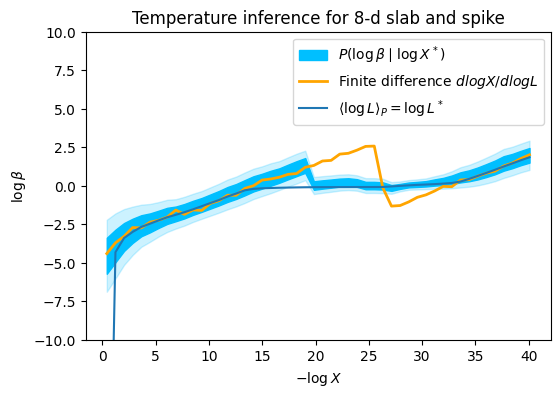

In [59]:
plot_std(-logXs, logbetas, logbetas_std, label=f'$P(\\log \\beta \\mid \\log X^* )$')
plt.plot(-logXs, logbetas_grad, color='orange', lw=2, label='Finite difference $dlogX/dlogL$')
plt.plot(-logXs, np.log(samples.beta_logL.iloc[iterations]), label=r'$\langle \log L \rangle_P = \log L^*$')
plt.ylim(-10, 10)
plt.legend(fontsize=10)
plt.gcf().set_size_inches(6, 4)
plt.ylabel("$\\log \\beta$", fontsize=10)
plt.xlabel("$-\\log X$", fontsize=10)
plt.title('Temperature inference for 8-d slab and spike')

In [128]:
# epsilon = 1e-3
# logXfs = np.zeros(len(iterations))
# logXfs_std = np.zeros(len(iterations))
# iterations = make_iterations(true_endpoint, 25)
# for i, ndead in enumerate(iterations):
#     points = points_at_iteration(samples, ndead)
#     logLmax = points.logL.iloc[-1]
#     logXi = points.logX(100).iloc[ndead]
#     logZrem = logLmax + logXi
#     logZ = points.logZ()
#     logXf_set = np.log(epsilon) + logXi + np.log(1 + np.exp(logZ - logLmax - logXi))
#     logXfs[i], logXfs_std[i] = logXf_set.mean(), logXf_set.std()

In [5]:
name, samples = get_samples('slab_spike')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

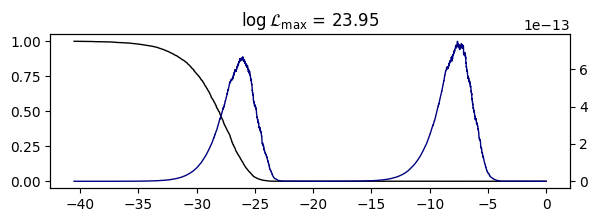

In [6]:
plot_lx(samples)

(-50.0, 50.0)

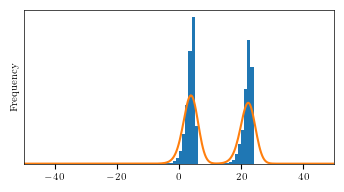

In [155]:
samples.logL.plot.hist(bins=100, range=(-50, 50), density=True)
samples.logL.plot.kde()
plt.xlim(-50, 50)

In [15]:
iterations = make_iterations(true_endpoint, 100)
logXs = samples.logX().iloc[iterations]
logbetas, logbetas_std = get_betas(model, get_beta_post, iterations)

 Iteration 6527 of 6527, logbeta=3.50

In [7]:
samples['beta_logL'] = get_betas_logL(samples)

In [16]:
logbetas_grad, _ = get_betas(model, get_beta_grad, iterations, interval=25)

 Iteration 6527 of 6527, logbeta=3.21

In [10]:
samples.beta_logL.is_monotonic_increasing

True

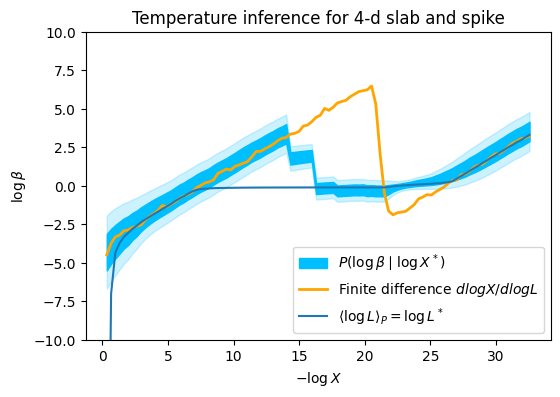

In [19]:
plot_std(-logXs, logbetas, logbetas_std, label=f'$P(\\log \\beta \\mid \\log X^* )$')
plt.plot(-logXs, logbetas_grad, color='orange', lw=2, label='Finite difference $dlogX/dlogL$')
plt.plot(-logXs, np.log(samples.beta_logL.iloc[iterations]), label=r'$\langle \log L \rangle_P = \log L^*$')
plt.ylim(-10, 10)
plt.legend(fontsize=10)
plt.gcf().set_size_inches(6, 4)
plt.ylabel("$\\log \\beta$", fontsize=10)
plt.xlabel("$-\\log X$", fontsize=10)
plt.title('Temperature inference for 4-d slab and spike')
plt.savefig('slab_spike_beta.pdf', bbox_inches='tight')

In [222]:
logXs.iloc[25]

-16.60851323175939

In [224]:
mean, std = logbetas[30], logbetas_std[30]
np.exp(np.random.normal(mean, std))

1.5679451947621759

1.1219301290956942


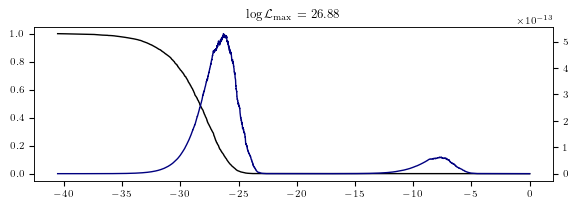

In [240]:
betas = np.exp(logbetas)
b = np.exp(np.random.normal(mean, std))
plot_lx(samples, beta=b)
print(b)

In [67]:
logX_star = -22
dead_index = np.argmin(abs(logX_star - logXs))
ndead = iterations[dead_index]
beta_post = np.exp(logbetas[dead_index])
beta_grad = np.exp(logbetas_grad[dead_index])
print('ndead:', ndead)
-logXs.iloc[dead_index], beta_post, beta_grad

ndead: 4504


(22.46902450910469, 0.9268913922578228, 0.17141604891833975)